<a href="https://colab.research.google.com/github/wlsisl/ESAA_22-2/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## chapter 04 분류

### 1) 분류의 개요

지도학습 : 레이블, 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블값( 결정값, 클래스값) 을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다. 

-> 즉 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것.

<분류는 다양한 머신러닝 알고리즘으로 구현할 수 있음>

* 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈 ( Naive Bayes)
* 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀 ( Logistic Regression)
* 데이터 균일도에 따른 규칙 기반의 결정트리(Decision Tree)
* 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
* 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
* 심층 연결 기반의 신경망(Neural Network)
* 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

### 앙상블 방법
* 정형 데이터의 예측 분석 영역에서는 앙상블이 매우 높은 예측 성능으로 인해 애용됨.
* 서로 다른 또는 같은 알고리즘을 단순히 결합한 형태도 있지만 일반적으로 배깅과 부스팅방식으로 나뉨. 대부분 동일한 알고리즘을 결합함
 1) 배깅 방식 
   -대표적으로 랜덤 포레스트가 있음.
  2) 부스팅 방식
    -그래디언트 부스팅/ 시간이 오래걸리는 단점이있었지만 Xgboost 와 LightGBM으로 발전시킴
* 앙상블 기본 알고리즘 : 결정트리
 -매우 쉽고 유연하게 적용되고 데이터의 스케일링이나 정규화 등 사전 가공의 영향이 적음. 
  -하지만 예측 성능 향상을 위해 복잡한 규칙 구조를 가져야하고 과적합이 발생해 반대로 예측 성능이 저하될 수도 있다는 단점이 있다. 하지만 이러한 단점이 앙상블에서는 장점으로 작용함

### 2)결정트리

데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다.

* if/else 기반으로 나타냄/ 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 효율적인 분류가 될 것인가가 알고리즘의 성능을 좌우함

<결정 트리 구조>
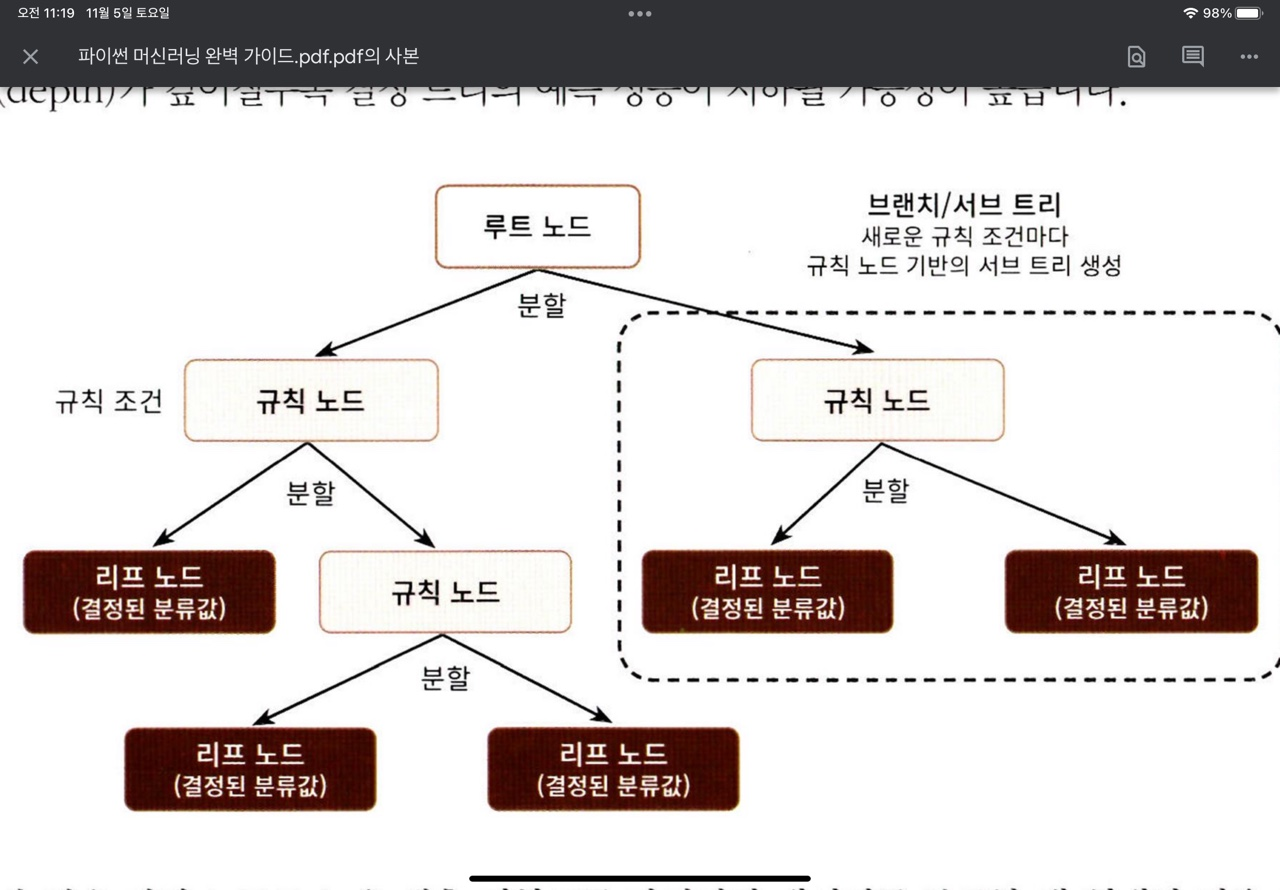
규칙 노드: 규칙 조건

많은 규칙 -> 분류 결정 방식 복잡-> 과적합
즉, 트리의 깊이가 깊어질수록 결정 트리의 예측 성느잉 저하될 가능성이 높다.

리프 노드: 결정된 클래스 값

서브트리 : 새로운 규칙 조건이 발생시 생성


예측 성능 저하 해결 : 가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 ㄴ데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야한다.
 -> 어떻게 트리를 분할할 것인가가 중요하다. 최대한 균일한 데이터 세트를 구성할 수 있도록 분할!

#### 균일한 데이터 세트가 어떤 것을 의미할까?
한 데이터 세트에서 모든 공이 검정 공일 때이다. 

데이터의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다.
 ex) 눈을 감고 공을 뽑을 때 모든 공이 검정이면(균일하면) 검정이라고 예측하기 쉽다.

**결정 노드**는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만든다.

정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아** 서브 데이터 세트**를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측한다. 

#### 정보 균일도를 측정하는 대표적인 방법

 엔트로피를 이용한 `정보이득 지수, 지니계수`

* 정보 이득은 엔트로피라는 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 즉 1-엔트로피 지수이다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성을 기준으로 분할한다. (**정보 지수가 크면 같은 값들이 많이 섞여있다는 뜻**)

* 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수이다. 0이 가장 평등하고 1로 갈수록 불평등하다. 머신러닝에 적용될 때는 **지니 계수가 낮을수록 데이터 균일도가 높은 것**으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

#### 결정 트리 모델의 특징
장점) 
1. 정보의 '균일도' 라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.

2. 정보의 균일도만 신경쓰면 되므로 특별한 경우 제외하고 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요하지 않다.

단점)
1. 과적합으로 정확도가 떨어진다. 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해짐


결정 트리는 학습데이터 기반 모델의 정확도를 높이기 위해 계속해서 조건을 추가하면서 트리 깊이가 커지고 결과적으로 복잡한 학습 모델이 된다. 이 모델은 실제상황( 테스트 데이터 세트) 에 유연하게 대처할 수 없어서 예측 성능이 떨어진다. 차라리 모든 데이터 상황을 만족하는 완벽한 규칙은 만들 수 없다고 인정하는 것이 성능을 보장할 수 있다. 

-> 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움이 된다.

#### 겨정 트리 파라미터

DecisionTreeClassifier(분류를 위한), DecisionTreeRegressor(회귀를 위한)클래스 : 결정 트리 알고리즘 구현 (CART알고리즘이라고 불림)

<클래스가 갖는 파라미터>

1. min_samples_split
- 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용
- 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
- 과적합을 제어

2. min_samples_leaf
- 말단 노드(leaf)가 되기 위한 최소한의 샘플 데이터 수
- 위의 파라미터와 유사하게 과적합 제어 용도. 그러나 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요.

3. max_features
- 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 none으로 데이터 세트의 모든 피처를 사용해 분할 수행.

4. max_depth
- 트리의 최대 깊이 규정

5. max_leaf_nodes
- 말단 노드의 최대 개수

#### 결정 트리 모델의 시각화
Graphviz 패키지 사용 : 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법

+ 더불어 export_graphviz() API제공

인자:` 학습이 완료된 estimator, 피처의 이름 리스트, 레이블 이름 리스트`

<graphviz 윈도우에 설치하기>
설치 후 Graphviz를 이용해 붓꽃 데이터 세트에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화해보자.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩하고 학습과 테스트 데이터 세트 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

이렇게 생성된 출력파일 'tree.dot'을 다음과 같이 파이썬 래퍼 모듈을 호출해 결정 트리의 규칙을 시각적으로 표현할 수 있다.

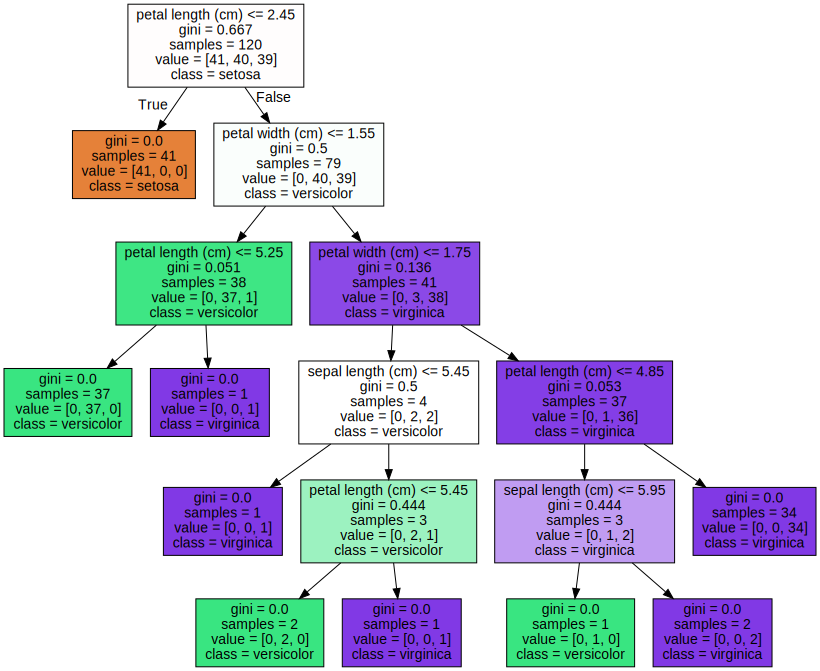

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f :
  dot_graph = f.read()
graphviz.Source(dot_graph)

출력 결과: 각 규칙에 따라 트리의 브랜치 노드와 말단 리프 노드가 어떻게 구성되는지 알 수 있다.


* 리프 노드 : 더이상 자식 노드가 없고 최종 클래스 값이 결정 되는 노드임.

* 브랜치 노드: 자식 노드가 있음.
* petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙조건이다.
* gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수이다.
* samples 는 현 규칙에 해당하는 데이터 건수
* value =[] 는 클래스 값 기반의 데이터 건수이다.


#### 트리 구성
1) 1번 노드
* samples=120 개는 전체 데이터 수 120개

* value=[41, 40, 39] : setosa 41, versicolor 40, virginica 39개로 데이터 구성

* gini=0.667 : 지니계수 0.667

* petal length<=2.45 : 자식노드 생성 

* class=setosa : 하위노드 가질 경우에 etosa의 개수가 41개로 가장 많다는 의미

2) 2번 노드
* petal_length <= 2.45 가 true인 규칙으로 생성되는 리프 노드임
* 41개의 샘플 데이터 모두 setosa이므로 예측 클래스는 setosa로 결정
* 지니 계수는 0

3) 3번 노드
* petal_length <= 2.45 가 false인 규칙 노드임
* petal width <= 1.55가 true인 자식 노드 생성.

4) 4번 노드
* petal width <= 1.55가 true인 규칙 노드 이다.

5) 5번 노드
* petal width <= 1.55가 false인 규칙 노드 생성.


각 노드 색 : 붓꽃 데이터 레이블 값
주황색은 0: setoas,  초록색은 1: versicolor, 보라색은 2: virginica 레이블

색 짙어질 수록 지니계수 낮고 해당 레이블 데이터 많다는 의미.

#### 트리 변화
1) mex_depth 하이퍼 파라미터 변경
- 결정 트리의 최대 깊이 제어
- 제한 없음에서 3개로 설정시 최대 깊이 줄어들어 더 간단한 결정트리가 된다.

2) min_samples_split 하이퍼 파라미터 변경
* 자식 규칙 노드 분할하기 위한 최소한의 샘플 데이터 개수
4로 설정했지만 샘플이 3개인 경우 더이상 분할하지 않고 리프 노드가 됨

3) min_samples_leaf 하이퍼 파라미터 변경
- 더이상 자식 노드가 없는 리프 노드는 클래스 결정 값이 되는데, 이것은 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값을 지정함.
- defulat=1 
- 단독 클래스로 구성 돼 있거나 데이터 1개로 구성된 경우 리프노드

-> 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다.

feature_importances_
- 결정 트리 알고리즘 학습에 중요한 피처의 역할 지표
- ndarray 형태로 피처 순서대로 값 할당
- 값 높을 수록 해당 feature 중요도가 높다. 

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


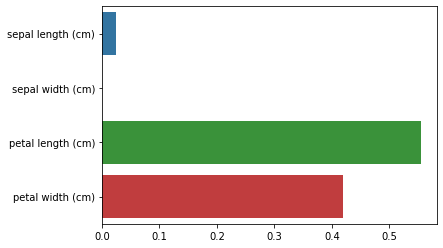

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합(overfitting)
결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는지와 이로 인한 과적합 문제를 시각화해 알아보자.

make_classification() : 분류를 위한 테스트용 데이터를 쉽게 만들 수 있도록 제공하는 함수

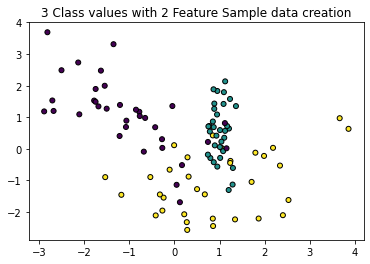

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Feature Sample data creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

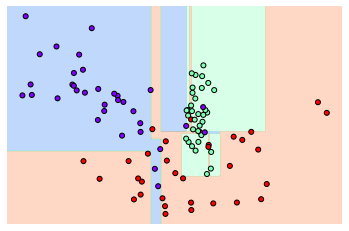

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 로 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

-> 일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 기준 경계가 매우 많아짐.

이렇게 복잡한 모델은 예측 정확도가 떨어진다.

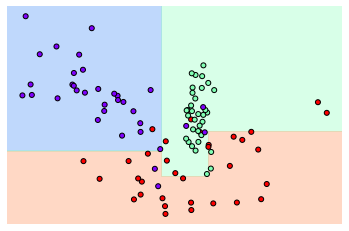

In [ ]:
# min_samples_leaf=6으로 트리 생성 조건 제약한 결정 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

-> 이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류됐다. 

## 03 앙상블 학습
- 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 에측을 도출하는 기법

- 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것.

<앙상블 학습의 유형>
1. 보팅
- 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정
- 서로 다른 알고리즘을 가진 분류기를 결합

2. 배깅 ( 랜덤 포레스트 알고리즘)
- 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정
- 서로 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습 수행해 보팅함.
- 교차검증과 다르게 중첩을 허용한다.

3. 부스팅
- 여러개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 가중치 부여해서 예측 진행.

4. 스태킹
- 여러가지 다른 모델의 예측 결괏갑승ㄹ 다시 학습데이ㅓㅌ로 만들어서 다른 모델로 재학습시켜 결과 예측함.

** 부트스트래핑 분할 방식 : 개별 classifier에게 데이터를 샘플링 해서 추출하는 방식


### 보팅유형 - 하드보팅과 소프트 보팅
1) 하드 보팅
- 다수결 원칙과 비슷
- 예측한 결괏값들중 다수의 분류기가 결정한 얘측값을 최종 보팅 결괏값으로 선정하는 것

2) 소프트 보팅
- 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 확률이 가장 높은 레이블 값을 최종 보팅 결괏값으로 선정

### 보팅 분류기
VotingClassifier 클래스: 보팅 방식의 앙상블 구현한 클래스

인자: ESTIMATORS와 VOTING값

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


* 

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


결과 : 보팅 분류기가 정확도가 조금 높게 나타남. 보팅으로 여러개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되는 것은 아니다.



---

### 04 랜덤 포레스트
배깅 : 같은 알고리즘으로 여러개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측을 결정을 하게 된다.

- 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트임

RandomForestClassifier 클래스 : 랜덤 포레스트 기반 분류 지원


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

FileNotFoundError: ignored

### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
 - 단점은 하이퍼 파라미터가 많고 그로 인해 튜닝 시간이 많이 소모됨.

 

In [ ]:
#GridSearchCV를 이용해 랜덤 포레스트의 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )  #n_jobs=-1 : 모든 cpu코어를 이용해 학습가능
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9451


In [ ]:
#최적화 하이퍼 파라미터로 다시 학습시킨 뒤에 별도의 테스트 데이터 세트에서 얘측 성능 측정해보기
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9386


In [ ]:
#피처 중요도 막대그래프로 ㅁ시각화
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

AttributeError: ignored

### 05 GBM
부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식

*AdaBoost 
- 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘

[GBM - 그래디언트 부스트]

- 에이다 부스트와 비슷하나 가중치 업데이트를 경사 하강법을 이용하는 것이 차이임
* 오류 값 : 실제 값 - 예측값
- 경사 하강법 : 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 법


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

FileNotFoundError: ignored

결과: GBM이 랜덤 포레스트 보다는 얘측 성능이 뛰어나다. 하지만 수행 시간이 오래걸려 극복해야할 과제이다.

### GBM 하이퍼 파라미터 및 튜닝
* loss : 경사 하강법에서 사용할 비용 함수 지정. 기본값: deviance
* learning_rate : gbm이 학습을 진행할 때마다 적용하는 학습률
* n_estimators : weak_learner의 개수
earning_rate와 상호 보완적으로 조합. learning_rate 작게하고 n_estimator 크게 하면 성능 최대로 좋아지지만 수행 시간이 오래걸림.
* subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율


In [ ]:
#GridSearchCV를 이용해 하이퍼 파라미터를 최적화해보자
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=2)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

NameError: ignored

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9386
